# Neural Network using Keras

## Libraries
Tensorflow : TensorFlow is a free and open-source software library for machine learning.

Keras : TensorFlow is a free and open-source software library for machine learning.

---

We are goint to use Input and Dense Layers for this tutorial.

Sequential Model will be built using these layers.

In [16]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Sequential


from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## About Data
We are using Iris dataset, it consists of 5 columns Sepal Length, Sepal Width, Petal Length, Petal Width and the Target column.

The Target column consits of 3 species i.e. Setosa, Versicolor and Virginica.
We have to predict the species of a flower based on the data from other 4 columns.

In [17]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# loading data
X = iris.data
y = iris.target

# getting number of targets and their names
class_names = iris.target_names
no_of_class = len(class_names)

In [19]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# one hot encoding the target class (as it is the only categorical class)
y_oh = np.eye(no_of_class)[y]

In [20]:
# spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size = 0.15)

In [21]:
# input shape for input layer
input_shape = X_train.shape[1:]

## Building the Neural Network
Our neural network will learn the paramaters necessary for the task by having a random prediction at the start and then optimizing the predictions by using optimizers, thus reducing the loss function and arriving at correct predictions.

In [22]:
# input layer is used for taking an input of a given shape
# Dense layers are the fully connented layers 
# i.e. each neuron of a given layer is connected to each neuron of the previous and next layer. 
# these layers are written in the sequence that they appear in the network
# activation fucntions are used to impart non-linearity
# if we non-linearity is not used then the whole neural network is as good as a linear regression model
# this is because the linear combination of linear elements is always going to give a linear answer
# thus a need of non-linearity was need to learn and approximate complex functions
# the parameter 'units' defines the number of neurons peresent in that layer 

model = Sequential([
              Input(shape = input_shape),
              Dense(units=64, activation='relu'),
              Dense(units=64, activation='relu'),
              Dense(units=128, activation='relu'),
              Dense(units=128, activation='relu'),
              Dense(units=64, activation='relu'),
              Dense(units=32, activation='relu'),
              Dense(units=16, activation='relu'),
              Dense(units=8, activation='relu'),
              Dense(units=3, activation='softmax')
])

In [23]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 16)               

In [24]:
# we need to compile the model before we can train it
# optimizer are the algoritms that decide how the model will learn its parameters
# loss function is calculated after each epoch and the model aims to minimize the loss functions
# derivatives of loss functions is calculated with respect to the model parameters in order to optimize the parameters
# metrics are used to know how good or bad our model is performing

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# for training the model we use fit function
# epochs is the number of iterations the model has to go through
# X_train and y_train is training data
# X_test and y_test is validation data
# the function returns the data about loss and metrics defined in the comiling stage
# these data can be used to plot the learning curve ahead

history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_test,y_test))

Epoch 1/10
4/4 [==============================] - 1s 69ms/step - loss: 1.0980 - accuracy: 0.3577 - val_loss: 1.0739 - val_accuracy: 0.6522
Epoch 2/10
4/4 [==============================] - 0s 14ms/step - loss: 1.0668 - accuracy: 0.6448 - val_loss: 1.0256 - val_accuracy: 0.6522
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 1.0173 - accuracy: 0.6667 - val_loss: 0.9474 - val_accuracy: 0.6522
Epoch 4/10
4/4 [==============================] - 0s 14ms/step - loss: 0.9398 - accuracy: 0.7106 - val_loss: 0.8076 - val_accuracy: 0.9565
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 0.8213 - accuracy: 0.8109 - val_loss: 0.6285 - val_accuracy: 0.7826
Epoch 6/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6661 - accuracy: 0.8014 - val_loss: 0.4572 - val_accuracy: 0.7826
Epoch 7/10
4/4 [==============================] - 0s 16ms/step - loss: 0.5104 - accuracy: 0.8097 - val_loss: 0.3423 - val_accuracy: 0.8696
Epoch 8/10
4/4 [===========

## Visualizing the Learning Curve
The loss and accuracy of the model at each epoch will be plotted to know if the model is learning correctly or not.

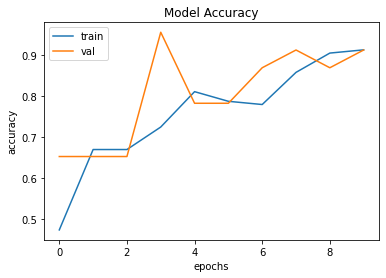

In [26]:
# plotting training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

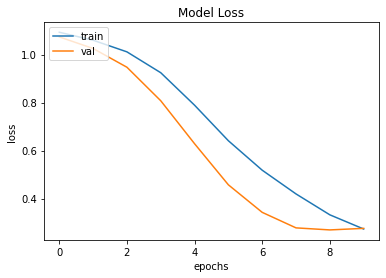

In [27]:
# plotting training and validation loss 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
# predict function is used to get predictions
# independent variables as passed as input for making predictions
# predictions are given as probabilities of each calss
# we use np.argmax to get the index of highest probability
 
predictions = model.predict(X_test)
preds = []
for i in predictions:
  preds.append(np.argmax(i))

targets = []
for i in y_test:
  targets.append(np.argmax(i))

## Making Predictions
Now we will make predictions and see how good our model is performing.

In [29]:
# printing the predictions made
# blue colour denote correct prediction and red denotes incorrect ones

print ("{:<20} {:<40}".format('Predictions', 'Targets\n'))

c=0
for i, j in zip(preds, targets):
  if(i==j):
    print('\33[94m')
  else:
    c += 1
    print('\33[91m')
  print ("{:<20} {:<40}".format(class_names[i], class_names[j]))

Predictions          Targets
                                

versicolor           versicolor                              

setosa               setosa                                  

setosa               setosa                                  

setosa               setosa                                  

setosa               setosa                                  

versicolor           versicolor                              

versicolor           versicolor                              

virginica            virginica                               

virginica            virginica                               

virginica            virginica                               

setosa               setosa                                  

virginica            versicolor                              

virginica            virginica                               

setosa               setosa                                  

virginica            virginica                         

In [30]:
print('We can observe that, {} out of {} examples are classified incorrectly and {} are correct.'.format(c, len(preds), len(preds)-c))
print('Test accuracy:', (len(preds)-c)/len(preds))
print('\33[91mNote that we have used the same data for test as well as validation and therefore the test and validation accuracy is same.')

We can observe that, 2 out of 23 examples are classified incorrectly and 21 are correct.
Test accuracy: 0.9130434782608695
Note that we have used the same data for test as well as validation and therefore the test and validation accuracy is same.
